In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d
import time
from scipy.interpolate import CubicSpline
def db2mag(db): return np.power(10, db/20)

In [12]:
# section for fitting. no need to install
from resonator_tools import circuit
from resonator_tools.circuit import notch_port

<div style="text-align: center; font-size: 45px; color: blue;">
    S18W11
</div>

# Fit

In [23]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Raw_data" 
sample_folders = os.listdir(global_address)
for sample_i in range(len(sample_folders)):
    if ".PNG" in sample_folders[sample_i]: pass
    else: 
        print(r"[%d]" %(sample_i), '----------->', sample_folders[sample_i]) 

[0] -----------> S11W6
[1] -----------> S18W11
[2] -----------> S5W2.7
[3] -----------> S7W4


In [27]:
sample_i_selected = 1
sample_address = global_address+"\\"+sample_folders[sample_i_selected]
sample_measurements = os.listdir(sample_address)
for meas_i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[meas_i]: pass
    else: 
        print(r"[%d]" %(meas_i), '----------->', sample_measurements[meas_i]) 

[0] -----------> Range_1
[1] -----------> Range_4


In [28]:
measurement_i_selected = 1
sample_measurement_address = sample_address+"\\"+sample_measurements[measurement_i_selected]
sample_measurement_data = os.listdir(sample_measurement_address)
for i in range(len(sample_measurement_data)):
    if ".PNG" in sample_measurement_data[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurement_data[i]) 

[0] -----------> TEMP_SCAN_range_4_res_0.mat
[1] -----------> TEMP_SCAN_range_4_res_1.mat
[2] -----------> TEMP_SCAN_range_4_res_2.mat
[3] -----------> TEMP_SCAN_range_4_res_3.mat
[4] -----------> TEMP_SCAN_range_4_res_4.mat
[5] -----------> TEMP_SCAN_range_4_res_5.mat
[6] -----------> TEMP_SCAN_range_4_res_6.mat
[7] -----------> TEMP_SCAN_range_4_res_7.mat
[8] -----------> TEMP_SCAN_range_4_res_8.mat
[9] -----------> TEMP_SCAN_range_4_res_9.mat


In [6]:
resonator = 0
file_address = sample_measurement_address+"\\"+sample_measurement_data[resonator]
print(file_address[60:])
mat = loadmat(file_address)
mat.keys()

Data\Temperature_sweep\Raw_data\S7W4\Range_1\TEMP_SCAN_range_1_res_0.mat


dict_keys(['__header__', '__version__', '__globals__', 'add_att_inside', 'powers', 'vna', 'mags', 'phas', 'temps'])

In [7]:
print(mat['add_att_inside'][0][0])
print(mat['vna'][0])
start_freq = mat['vna'][0][0][2][0][0]
stop_freq = mat['vna'][0][0][3][0][0]
nop = mat['vna'][0][0][4][0][0]
freqs = np.linspace(start_freq, stop_freq, nop)
print(len(freqs))
power = mat['powers'][0][0]
print(power)
phas = mat['phas'][:,:nop]
print(phas.shape)
mags = mat['mags'][:,:nop]
print(mags.shape)
temps = mat['temps'][0]
print(mags.shape)

20
[(array([[4.61609079e+09]]), array([[300000.]]), array([[4.61594079e+09]]), array([[4.61624079e+09]]), array([[2001]]), array([[18.49]]), array([[20]]), array([[-30]]), array([[0]]), array([[1]]))]
2001
-30.0
(53, 2001)
(53, 2001)
(53, 2001)


In [33]:
temps

array([1.10847, 1.10847, 1.10847, 1.47218, 1.54449, 1.54464, 1.54464,
       1.72011])

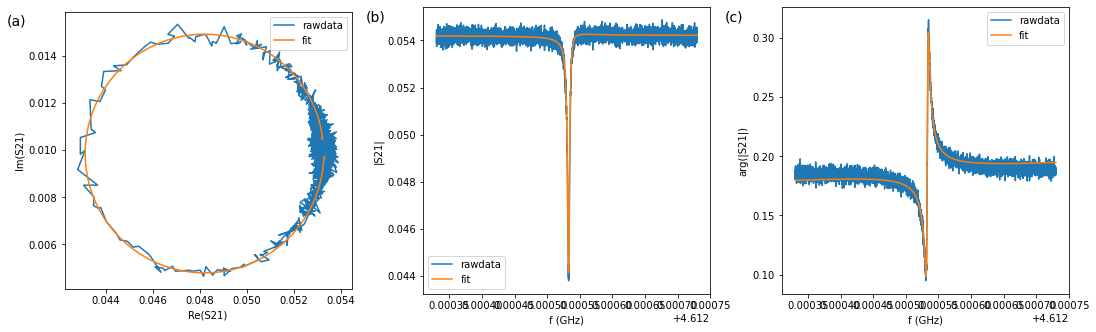

{'Qi_dia_corr': 1405183.7502538466,
 'Qi_no_corr': 1408368.6953991011,
 'absQc': 6128208.071720275,
 'Qc_dia_corr': 6189249.397875652,
 'Ql': 1145185.2311459666,
 'fr': 4612533046.621217,
 'theta0': 3.001031417226313,
 'phi0': -0.1405612363634804,
 'phi0_err': 0.007745615983542365,
 'Ql_err': 11255.959777294498,
 'absQc_err': 41410.920324065606,
 'fr_err': 21.38840717130252,
 'chi_square': 3.4908340993520616e-05,
 'Qi_no_corr_err': 15712.036170268195,
 'Qi_dia_corr_err': 15665.456801138898}

In [36]:
# testing fit
# %matplotlib qt
power_num = -1
S21 = db2mag(mags[power_num])*np.exp(1j*(phas[power_num]))
port1 = notch_port(freqs, S21)
port1.autofit()
port1.plotall()
port1.fitresults

# Fit all powers for all resonators

In [29]:
%matplotlib inline

NEW RESONATOR -->  9
0 --> NEW TEMP: 1.48888
New fit
1 --> NEW TEMP: 1.49286
New fit


C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:395: RuntimeWarning: invalid value encountered in sqrt
  errors = np.sqrt(np.diagonal(cov))
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:400: RuntimeWarning: invalid value encountered in sqrt
  Qi_no_corr_err = np.sqrt((dQl**2*cov[2][2]) + (dabsQc**2*cov[1][1])+(2*dQl*dabsQc*cov[2][1]))  #with correlations
C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Scripts\resonator_tools\circuit.py:408: RuntimeWarning: invalid value encountered in sqrt
  Qi_dia_corr_err =  np.sqrt(err1+2*err2)	 # including correlations
C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of th

2 --> NEW TEMP: 1.7
New fit
3 --> NEW TEMP: 1.7
-0.006163446304877418


C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


-------> 1st Fit
4 --> NEW TEMP: 1.7
-0.0061326971766488825
-------> 1st Fit
5 --> NEW TEMP: 1.7
New fit


C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


6 --> NEW TEMP: 1.7
-0.00643284131468036
-------> 1st Fit
7 --> NEW TEMP: 1.7
-0.006237326248822228
-------> 1st Fit
8 --> NEW TEMP: 1.7
New fit
9 --> NEW TEMP: 1.7
-0.006630619958900574
-------> 1st Fit
10 --> NEW TEMP: 1.7
-0.006826052287970619
-------> 1st Fit
11 --> NEW TEMP: 1.7
-0.006844023756813478
-------> 1st Fit
12 --> NEW TEMP: 1.73192
New fit
13 --> NEW TEMP: 1.8
14 --> NEW TEMP: 1.9
15 --> NEW TEMP: 2.0
-0.006845755426280853
-------> 1st Fit
16 --> NEW TEMP: 2.1


C:\Users\mukha\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 200.
  warnings.warn(errors[info][0], RuntimeWarning)


-0.006847329454201301
-------> 1st Fit
17 --> NEW TEMP: 2.1
-0.006852105801862685
-------> 1st Fit
18 --> NEW TEMP: 2.2
-0.006857231833406807
-------> 1st Fit
19 --> NEW TEMP: 2.3
-0.006857246693002139
-------> 1st Fit
20 --> NEW TEMP: 2.3
-0.0068650067030278095
-------> 1st Fit
21 --> NEW TEMP: 2.4
-0.006880378378750329
-------> 1st Fit
22 --> NEW TEMP: 2.4
-0.006861621183167799
-------> 1st Fit
23 --> NEW TEMP: 2.5
-0.0068808852881119265
-------> 1st Fit
24 --> NEW TEMP: 2.5


<ipython-input-30-16056015dfa2>:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True)


-0.006830240278977939
-------> 1st Fit
25 --> NEW TEMP: 2.6
-0.006847511470616574
-------> 1st Fit
26 --> NEW TEMP: 2.7
-0.0068463064793506945
-------> 1st Fit
27 --> NEW TEMP: 2.8
-0.006853067022270842
-------> 1st Fit
28 --> NEW TEMP: 2.9
-0.0068850976958900745
-------> 1st Fit
29 --> NEW TEMP: 3.0
-0.00688702259078422
-------> 1st Fit
30 --> NEW TEMP: 3.1
-0.0069125494470814175
-------> 1st Fit
31 --> NEW TEMP: 3.2
-0.006965356474476714
-------> 1st Fit
32 --> NEW TEMP: 3.3
-0.006982248896885146
-------> 1st Fit
33 --> NEW TEMP: 3.3
-0.007017167689537196
-------> 1st Fit
34 --> NEW TEMP: 3.4
-0.00698742292720933
-------> 1st Fit
35 --> NEW TEMP: 3.5
-0.006923794496776381
-------> 1st Fit
36 --> NEW TEMP: 3.5
-0.006895155450293622
-------> 1st Fit
Data\Temperature_sweep\Fitted_data\S18W11\Range_4\Circlefit_res_0.mat


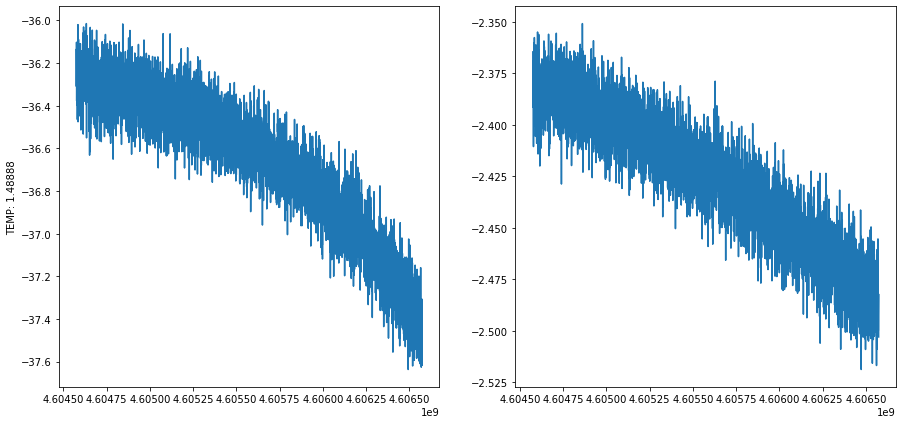

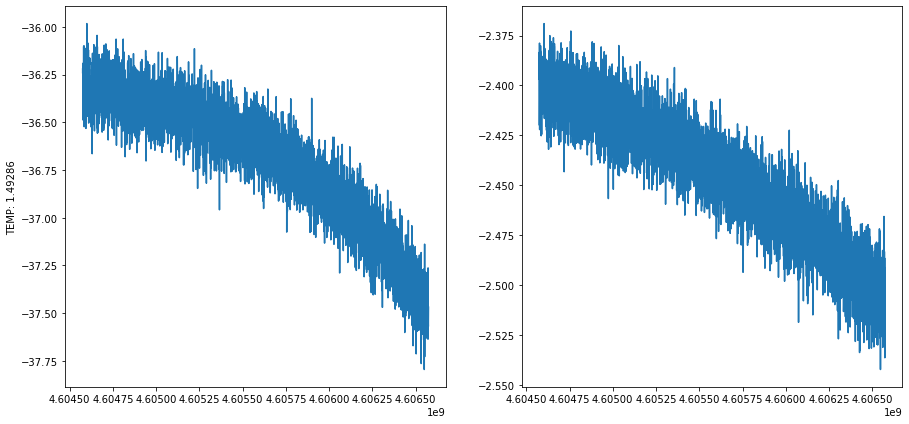

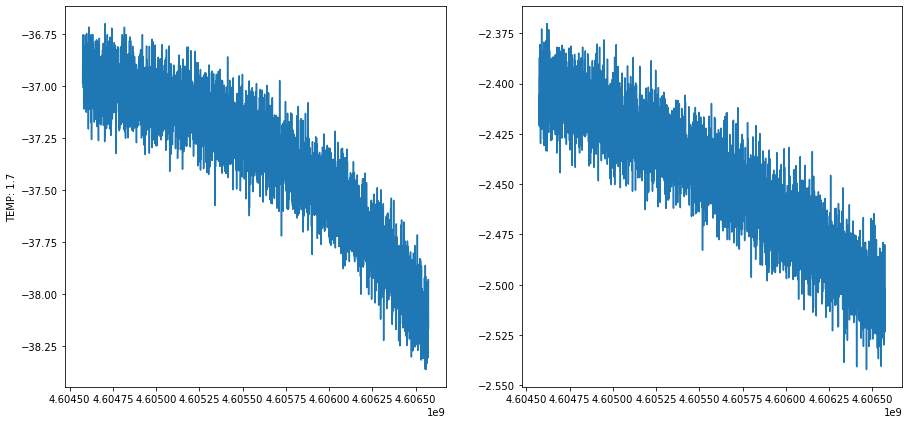

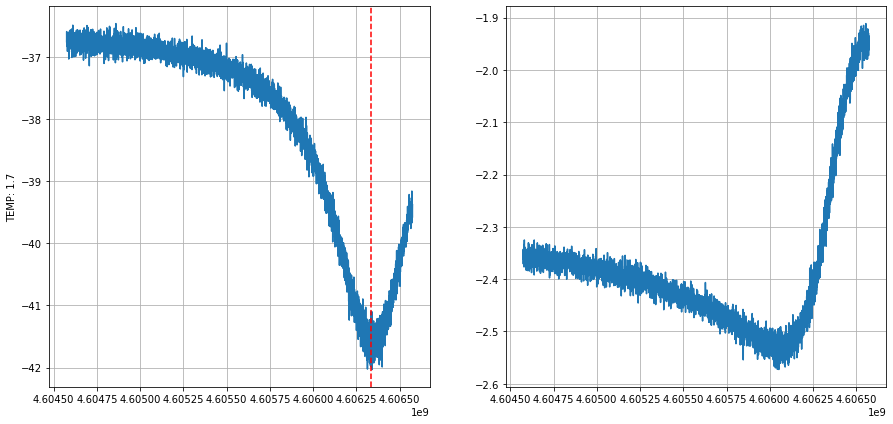

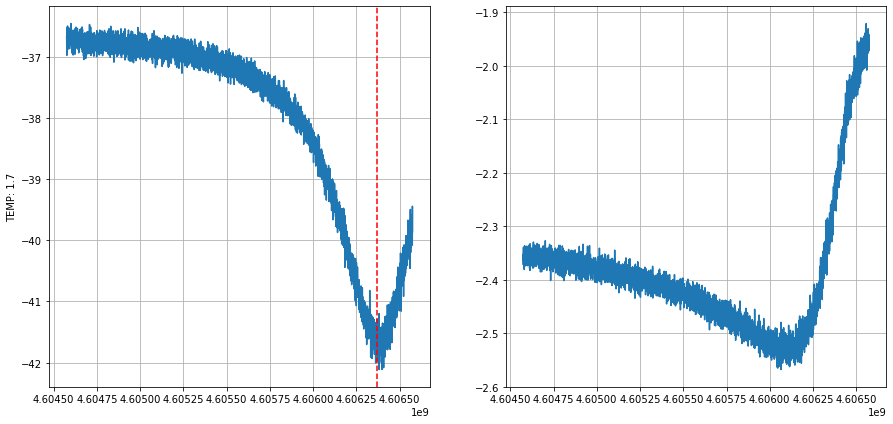

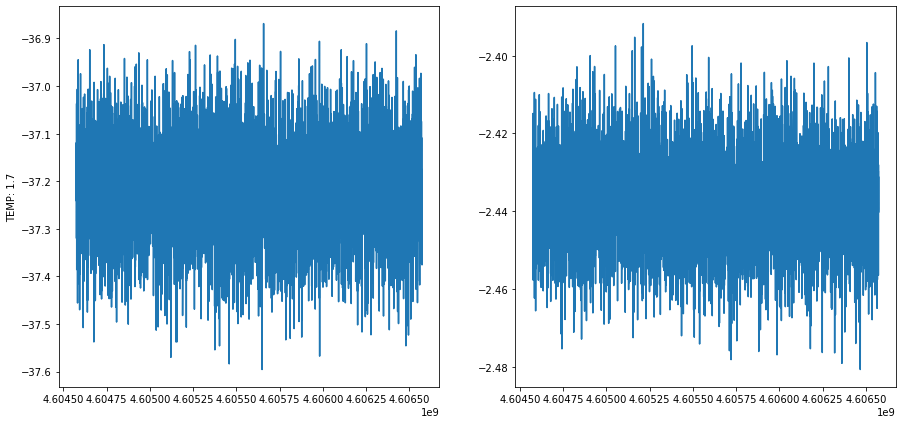

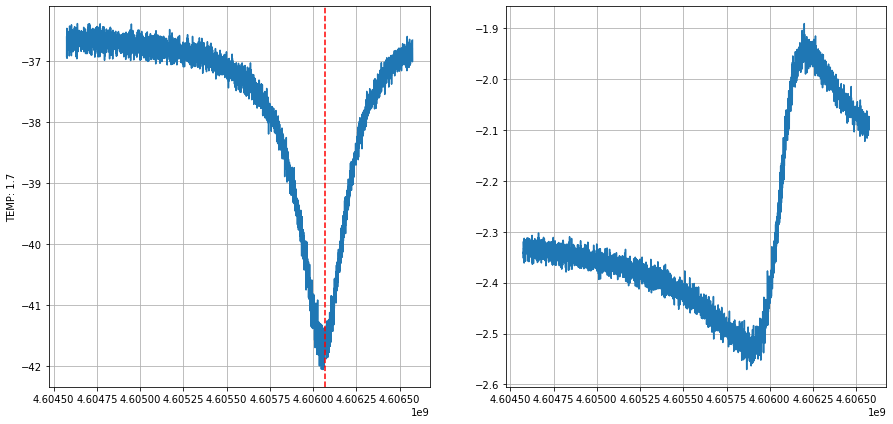

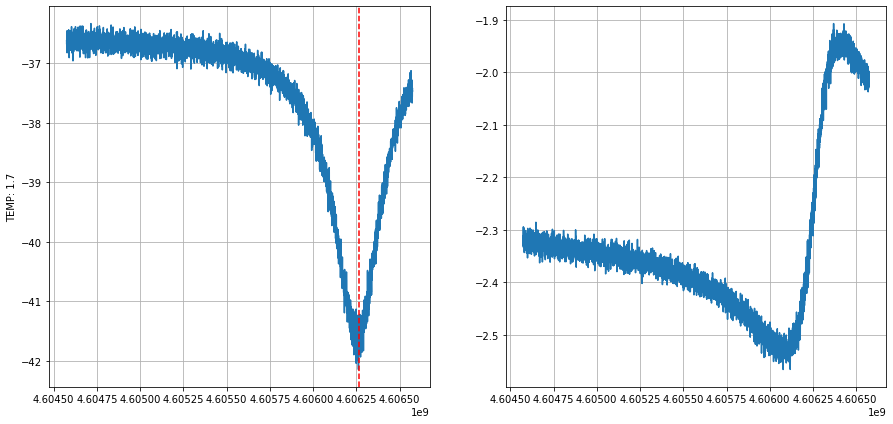

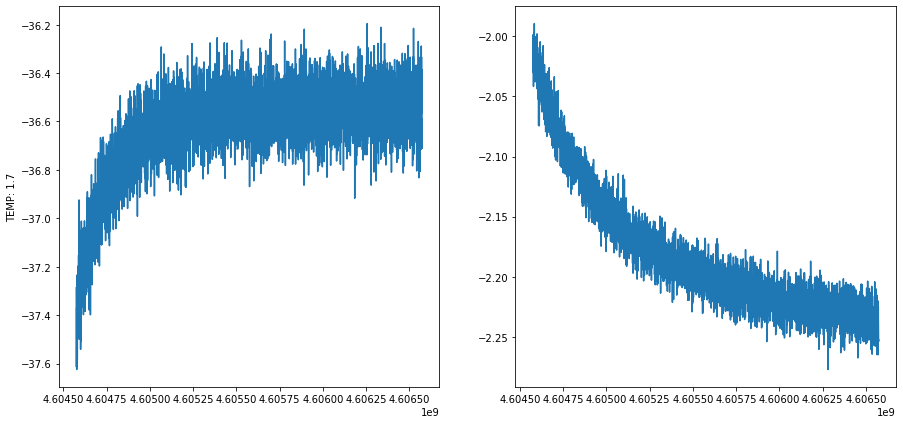

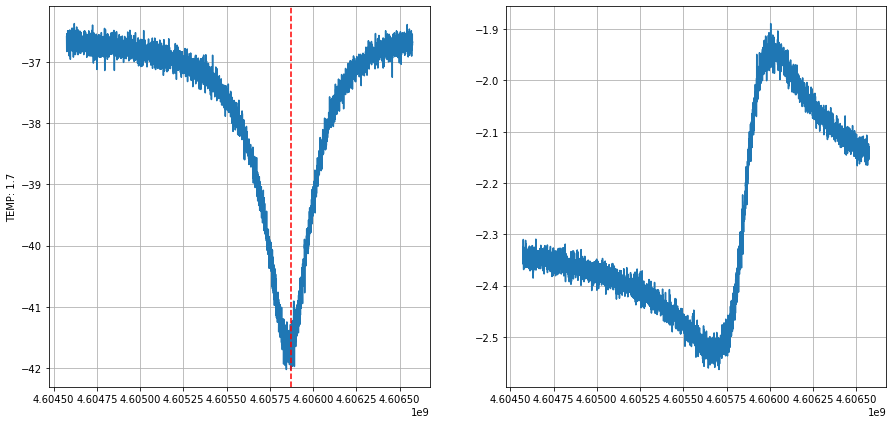

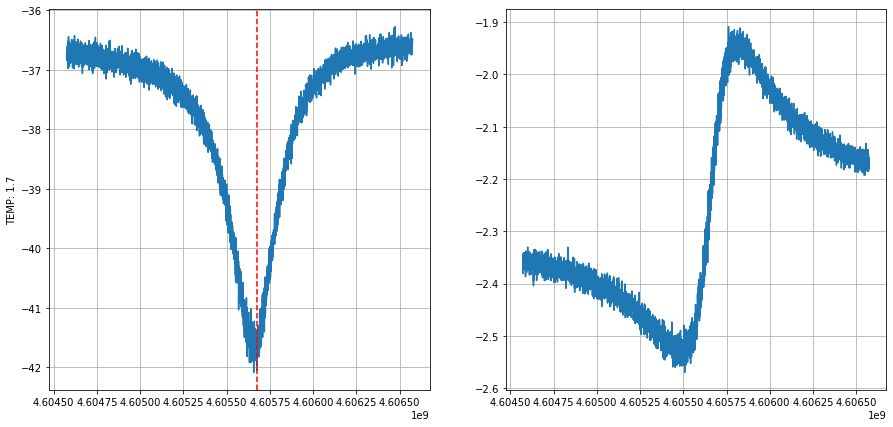

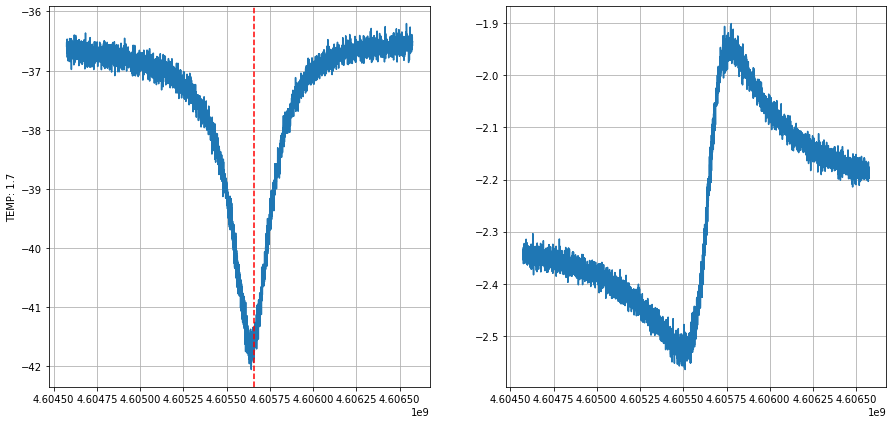

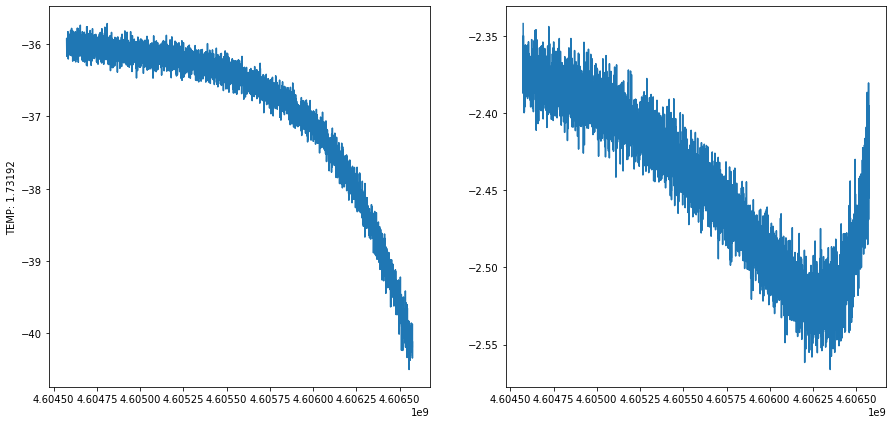

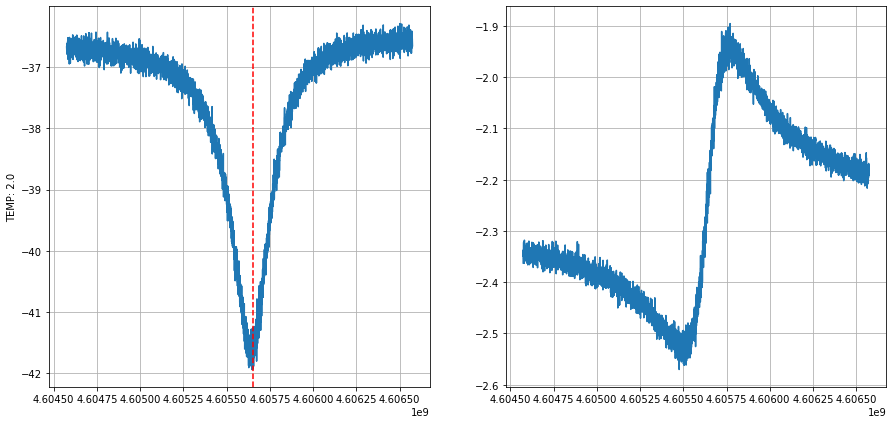

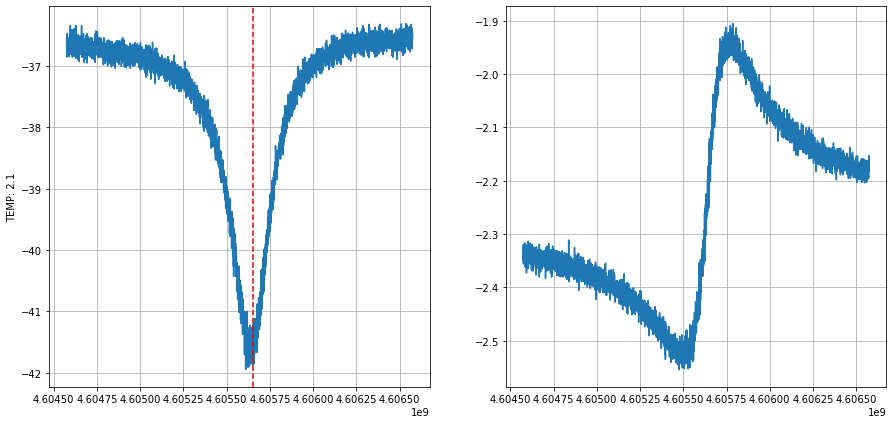

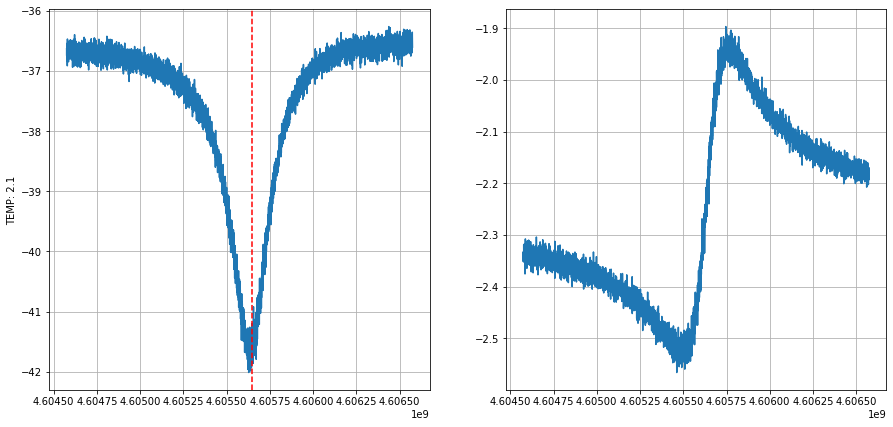

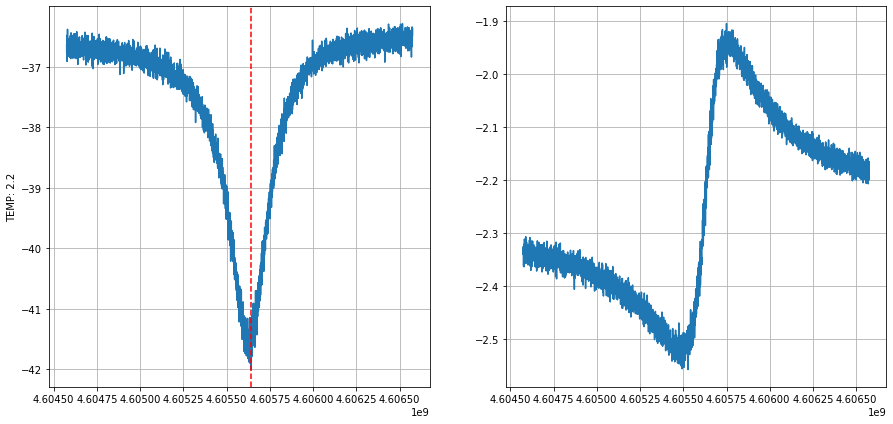

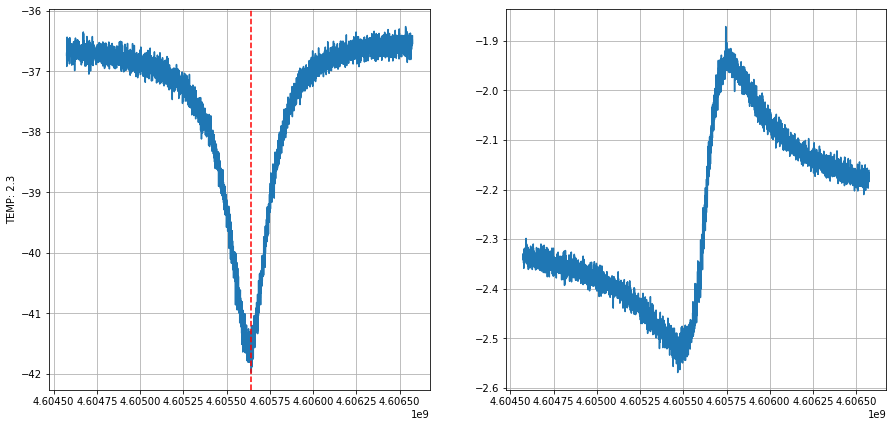

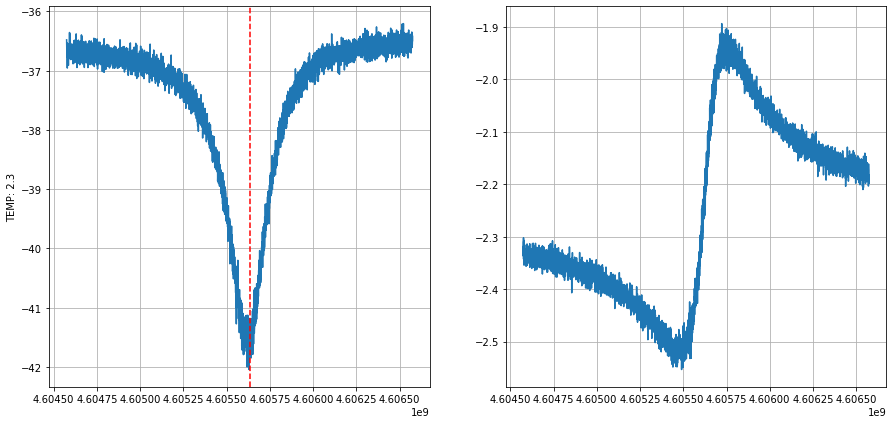

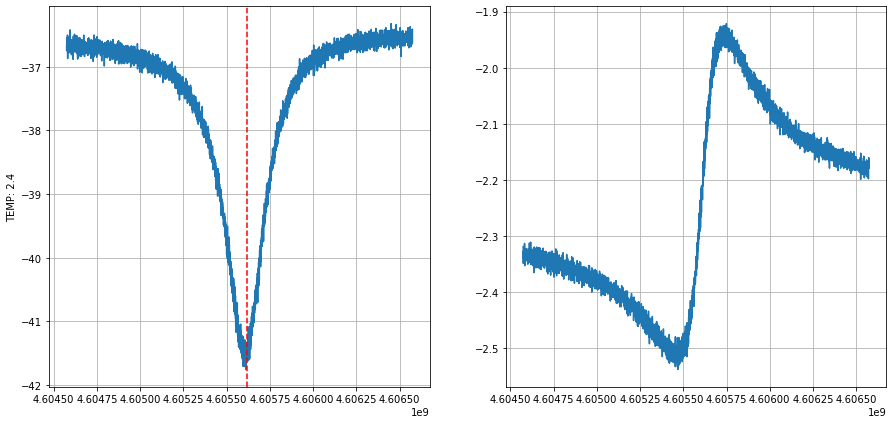

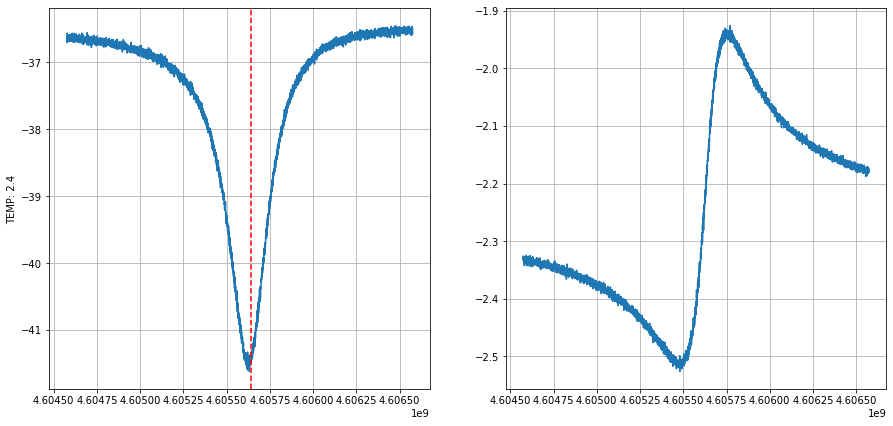

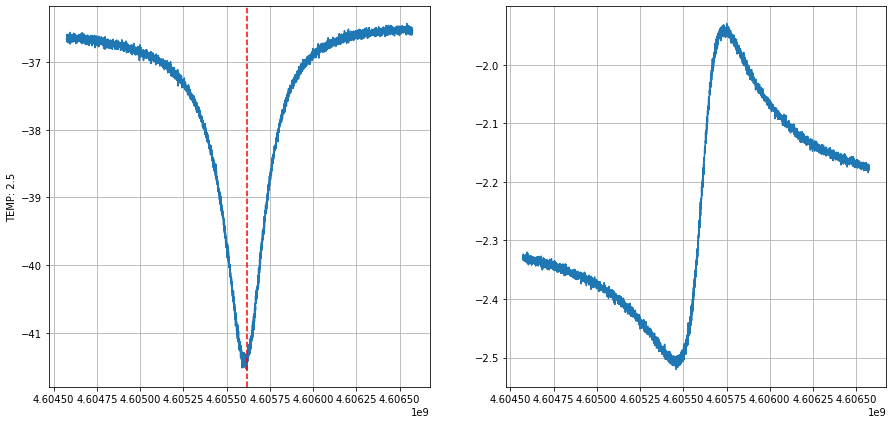

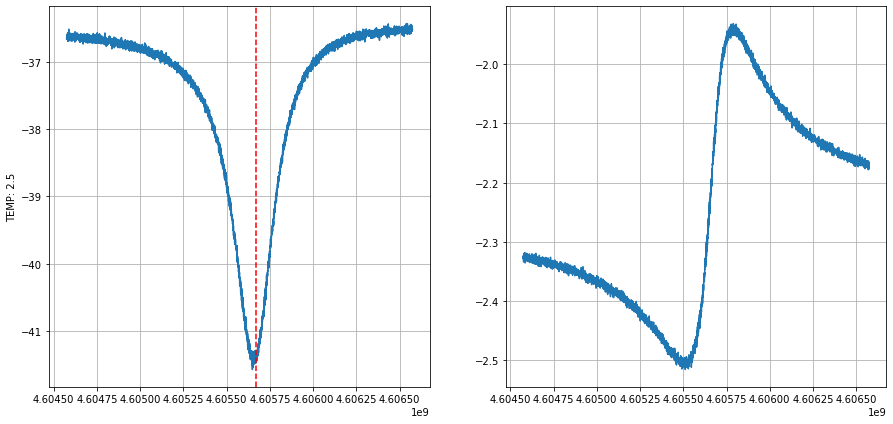

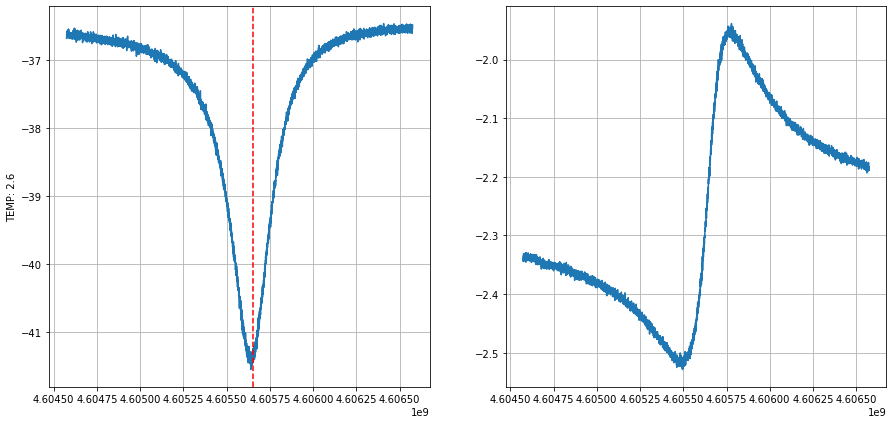

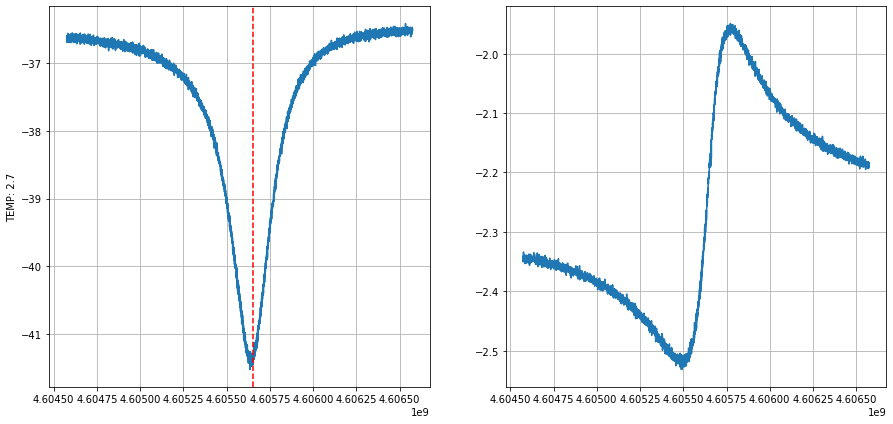

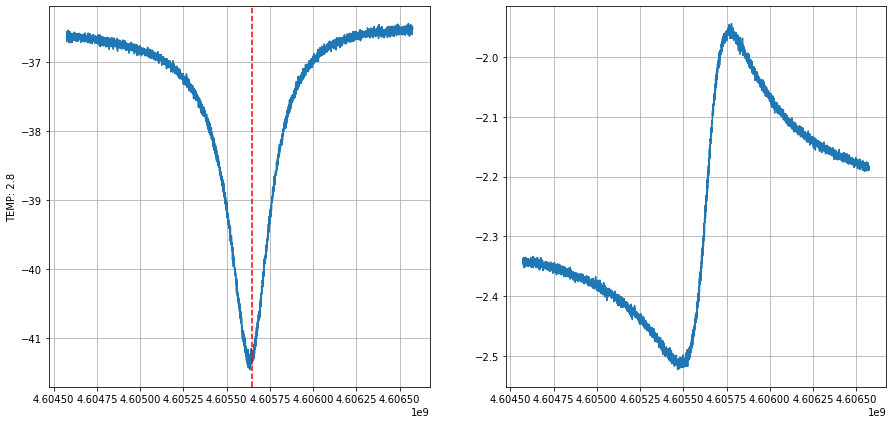

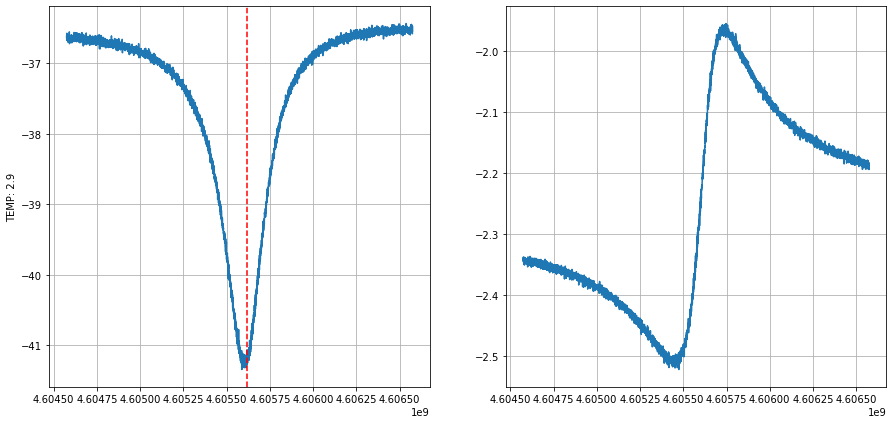

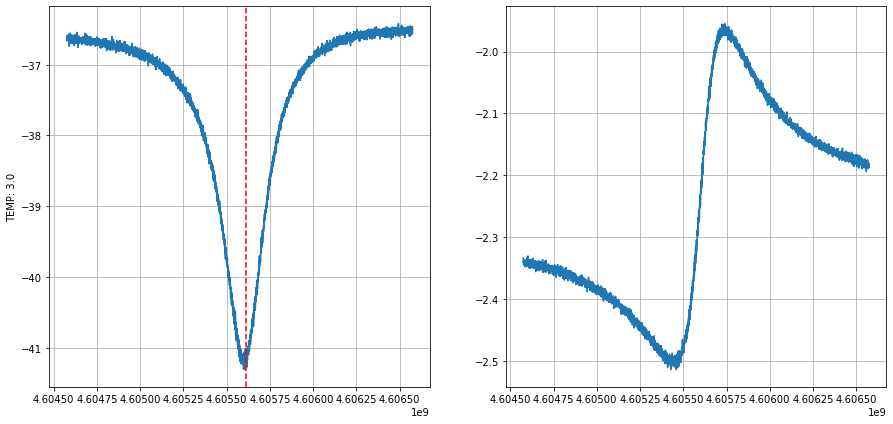

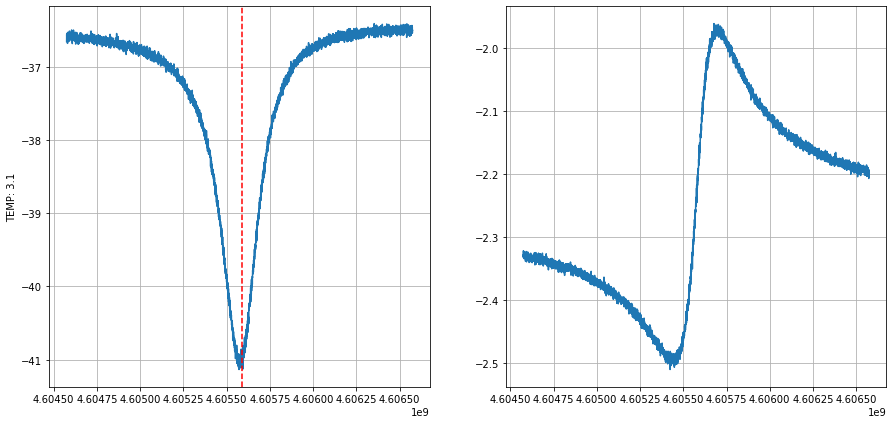

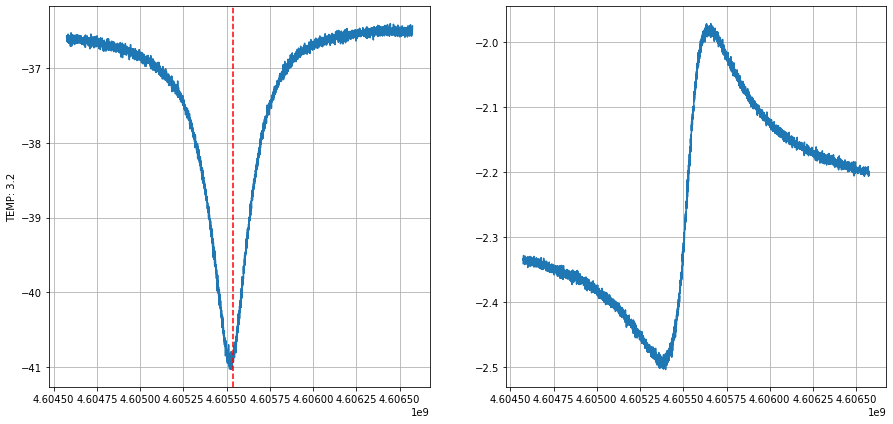

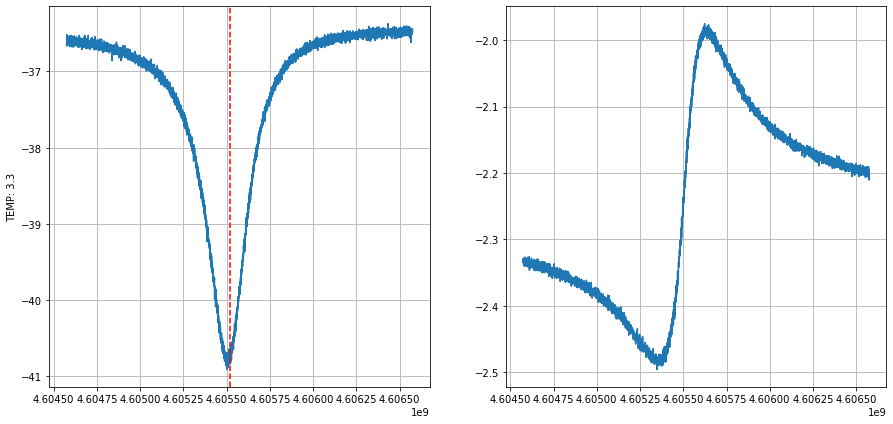

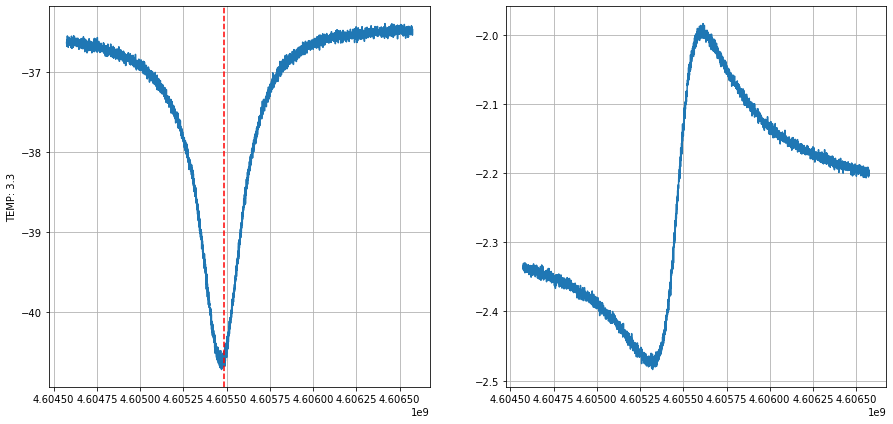

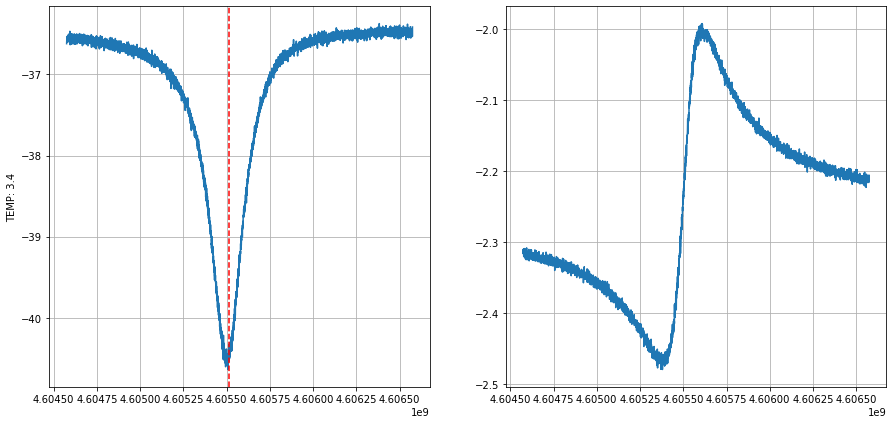

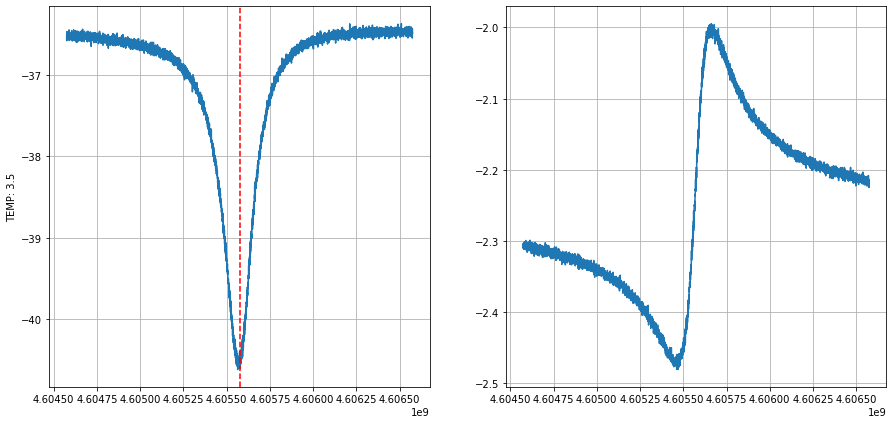

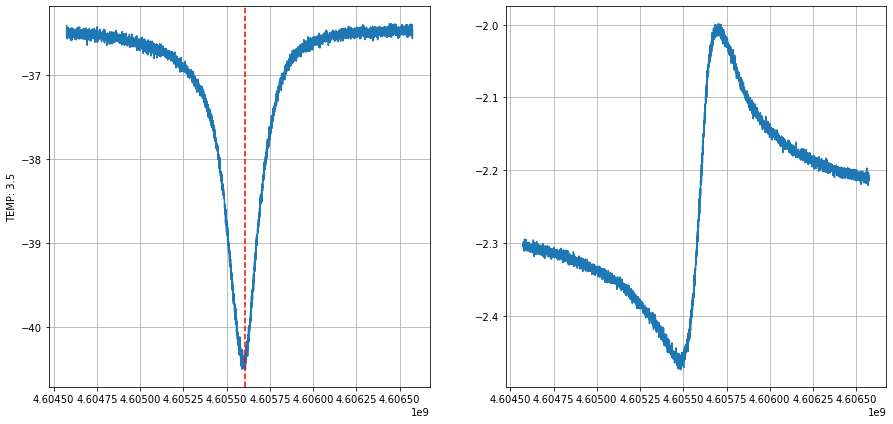

In [30]:
for ii in range(1):
    print("NEW RESONATOR --> ", resonator)
    resonator = 0
    file_address_loop = sample_measurement_address+"\\"+sample_measurement_data[resonator]
#     print(file_address_loop[60:])
    mat = loadmat(file_address_loop)
    temps = mat['temps'][0]

    start_freq = mat['vna'][0][0][2][0][0]
    stop_freq = mat['vna'][0][0][3][0][0]
    nop = mat['vna'][0][0][4][0][0]
    freqs = np.linspace(start_freq, stop_freq, nop)
    phas = mat['phas'][:,:nop]
    mags = mat['mags'][:,:nop]
    

    resonanse_freq = np.array([])
    resonanse_ql = np.array([])
    resonanse_qc = np.array([])
    resonanse_qi = np.array([])

    resonanse_freq_err = np.array([])
    resonanse_ql_err = np.array([])
    resonanse_qc_err = np.array([])
    resonanse_qi_err = np.array([])

    good_temps = np.array([])
    for p in range(len(temps)):
        print(p, '--> NEW TEMP:', temps[p])
        mags_to_plot = mags[p]
        idx_cut = 0
        while mags_to_plot[idx_cut]<0 and idx_cut<len(mags_to_plot)-1:
            idx_cut = idx_cut+1
        mags_to_plot = mags_to_plot[:idx_cut]
        phas_to_plot = (phas[p])[:idx_cut]
        freqs_to_plot = freqs[:idx_cut]
      
        try:
            if db2mag(mags[p][0]) != 1: 
                S21 = db2mag(mags_to_plot)*np.exp(1j*(phas_to_plot))
                port1 = notch_port(freqs_to_plot, S21)
                port1.autofit()
    #             port1.plotall()

                if (port1.fitresults['Ql_err']/port1.fitresults['Ql']<0.3 
                    and port1.fitresults['Ql_err']<1e11
                    and port1.fitresults['Ql']<1e7
                    and port1.fitresults['Ql']>0 
                    and port1.fitresults['Qi_no_corr']>0
                    and port1.fitresults['absQc']>0):

                    good_temps = np.append(good_temps, temps[p])
                    resonanse_freq = np.append(resonanse_freq, port1.fitresults['fr'])
                    resonanse_ql = np.append(resonanse_ql, port1.fitresults['Ql'])
                    resonanse_qc = np.append(resonanse_qc, port1.fitresults['absQc'])
                    resonanse_qi = np.append(resonanse_qi, port1.fitresults['Qi_no_corr'])

                    resonanse_freq_err = np.append(resonanse_freq_err, port1.fitresults['fr_err'])
                    resonanse_ql_err = np.append(resonanse_ql_err, port1.fitresults['Ql_err'])
                    resonanse_qc_err = np.append(resonanse_qc_err, port1.fitresults['absQc_err'])
                    resonanse_qi_err = np.append(resonanse_qi_err, port1.fitresults['Qi_no_corr_err'])
                    print(port1.fitresults['fr']/1e9-4.6125)

                    try:
                        if len(freqs) > 0 and len(mags[p]) > 0:
                            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True) 
                            ax[0].set_ylabel(f"TEMP: {temps[p]}")
                            ax[0].plot(freqs_to_plot, mags_to_plot)
                            ax[1].plot(freqs_to_plot, phas_to_plot)
                            ax[0].axvline(x=port1.fitresults['fr'], color='r', linestyle='--')
                            ax[0].grid()
                            ax[1].grid()
        #                   time.sleep(1)
                            print("-------> 1st Fit")
                    except:
                        print("Fatal error")
                else: 
                    try:
                        if len(freqs) > 0 and len(mags[p]) > 0:
                            mags_to_plot = mags[p]
                            idx_cut = 0
                            while mags_to_plot[idx_cut]<0 and idx_cut<len(mags_to_plot)-1:
                                idx_cut = idx_cut+1
                            mags_to_plot = mags_to_plot[:idx_cut]
                            phas_to_plot = (phas[p])[:idx_cut]
                            freqs_to_plot = freqs[:idx_cut]
                            
                            cs = CubicSpline(freqs_to_plot, mags_to_plot)
                            freqs_to_plot_sp = np.linspace(freqs_to_plot.min(), freqs_to_plot.max(), 600)
                            mags_to_plot_sp = cs(freqs_to_plot_sp)
                            
                            cs = CubicSpline(freqs_to_plot, phas_to_plot)
                            freqs_to_plot_sp = np.linspace(freqs_to_plot.min(), freqs_to_plot.max(), 600)
                            phas_to_plot_sp = cs(freqs_to_plot_sp)
                            
                            try:
                                if db2mag(mags[p][0]) != 1: 
                                    S21 = db2mag(mags_to_plot_sp)*np.exp(1j*(phas_to_plot_sp))
                                    port1 = notch_port(freqs_to_plot_sp, S21)
                                    print('New fit')
                                    port1.autofit()
                            
                                if (port1.fitresults['Ql_err']/port1.fitresults['Ql']<0.3 
                                    and port1.fitresults['Ql_err']<1e11
                                    and port1.fitresults['Ql']>0 
                                    and port1.fitresults['Ql']<1e7
                                    and port1.fitresults['Qi_no_corr']>0
                                    and port1.fitresults['absQc']>0):

                                    good_temps = np.append(good_temps, temps[p])
                                    resonanse_freq = np.append(resonanse_freq, port1.fitresults['fr'])
                                    resonanse_ql = np.append(resonanse_ql, port1.fitresults['Ql'])
                                    resonanse_qc = np.append(resonanse_qc, port1.fitresults['absQc'])
                                    resonanse_qi = np.append(resonanse_qi, port1.fitresults['Qi_no_corr'])

                                    resonanse_freq_err = np.append(resonanse_freq_err, port1.fitresults['fr_err'])
                                    resonanse_ql_err = np.append(resonanse_ql_err, port1.fitresults['Ql_err'])
                                    resonanse_qc_err = np.append(resonanse_qc_err, port1.fitresults['absQc_err'])
                                    resonanse_qi_err = np.append(resonanse_qi_err, port1.fitresults['Qi_no_corr_err'])
                                    print(port1.fitresults['fr']/1e9-4.6125)

                                    try:
                                        if len(freqs) > 0 and len(mags[p]) > 0:
                                            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True) 
                                            ax[0].set_ylabel(f"TEMP: {temps[p]}")
                                            ax[0].plot(freqs_to_plot, mags_to_plot)
                                            ax[1].plot(freqs_to_plot, phas_to_plot)
                                            ax[0].axvline(x=port1.fitresults['fr'], color='green', linestyle='-')
                                            ax[0].grid()
                                            ax[1].grid()
                        #                   time.sleep(1)
                                            print("-------> 2nd Fit")
                                    except:
                                        print("Fatal error")
                                else: 
                                    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True) 
                                    ax[0].set_ylabel(f"TEMP: {temps[p]}")
                                    ax[0].plot(freqs_to_plot, mags_to_plot)
                                    ax[1].plot(freqs_to_plot, phas_to_plot)

                            except:
                                print("Fatal error")

                    except:
                        print("Fatal error")
                
        except: 
            try:
                print("---> Just plotted")
                if len(freqs) > 0 and len(mags[p]) > 0:
                    mags_to_plot = mags[p]
                    idx_cut = 0
                    while mags_to_plot[idx_cut]<0 and idx_cut<len(mags_to_plot)-1:
                        idx_cut = idx_cut+1
                    mags_to_plot = mags_to_plot[:idx_cut]
                    phas_to_plot = (phas[p])[:idx_cut]
                    freqs_to_plot = freqs[:idx_cut]

                    cs = CubicSpline(freqs_to_plot, mags_to_plot)
                    freqs_to_plot_sp = np.linspace(freqs_to_plot.min(), freqs_to_plot.max(), 600)
                    mags_to_plot_sp = cs(freqs_to_plot_sp)

                    cs = CubicSpline(freqs_to_plot, phas_to_plot)
                    freqs_to_plot_sp = np.linspace(freqs_to_plot.min(), freqs_to_plot.max(), 600)
                    phas_to_plot_sp = cs(freqs_to_plot_sp)

                    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True) 
                    ax[0].set_ylabel(f"TEMP: {temps[p]}")
                    ax[0].plot(freqs_to_plot, mags_to_plot)
                    ax[1].plot(freqs_to_plot, phas_to_plot)
                    ax[0].plot(freqs_to_plot_sp, mags_to_plot_sp)
                    ax[1].plot(freqs_to_plot_sp, phas_to_plot_sp)
                    ax[0].grid()
                    ax[1].grid()
                else: 
                    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex = True) 
                    ax[0].set_ylabel(f"TEMP: {temps[p]}")
                    ax[0].plot(freqs, mags[p])
                    ax[1].plot(freqs, phas[p])
                    ax[0].grid()
                    ax[1].grid()
            except:
                print("Fatal error")
#         time.sleep(1)

            
    
    file_directory = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Fitted_data" 
    sample = sample_folders[sample_i_selected]
    meas = sample_measurements[measurement_i_selected]
    file_name = "Circlefit_res_" + str(resonator) + ".mat"
    sample_address_to_save = file_directory+"\\"+sample+"\\"+meas+"\\"+file_name

    fitting_state = dict()
    fitting_state['resonanse_freq'] = resonanse_freq
    fitting_state['resonanse_ql'] = resonanse_ql
    fitting_state['resonanse_qc'] = resonanse_qc
    fitting_state['resonanse_qi'] = resonanse_qi
    fitting_state['resonanse_freq_err'] = resonanse_freq_err
    fitting_state['resonanse_ql_err'] = resonanse_ql_err
    fitting_state['resonanse_qc_err'] = resonanse_qc_err
    fitting_state['resonanse_qi_err'] = resonanse_qi_err

    fitting_state['good_temps'] = good_temps

    fitting_state['original_file'] = file_address_loop
    fitting_state['additional_room_attenuation'] = "???"
    fitting_state['sample'] = sample

    print(sample_address_to_save[60:])
    savemat(sample_address_to_save, fitting_state)

In [43]:
data = np.array([
    [3.2, 7.05167377],
    [3.0, 7.05174713],
    [2.9, 7.05173315],
    [2.8, 7.0517385],
    [2.42, 7.0516844],
    [1.9, 7.05172901],
])

# Разделяем на два массива по столбикам
man_temp = data[:, 0]
man_fr = data[:, 1]

In [33]:
a = 7.0517294+7.0517369
a/2

7.0517331500000004

In [44]:
man_fits_folder = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Fitted_data\S5W2.7\Qannual_fits"

file_name = "Manfit_res_" + str(resonator) + ".mat"
man_file = man_fits_folder+"\\" + file_name
    
man_fitting_state = dict()

man_fitting_state['man_temp'] = man_temp
man_fitting_state['man_fr'] = man_fr

savemat(man_file, man_fitting_state)